https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/facebookresearch_pytorch-gan-zoo_pgan.ipynb#scrollTo=_h6SxZMt5Tpy

### This notebook is optionally accelerated with a GPU runtime.
### If you would like to use this acceleration, please select the menu option "Runtime" -> "Change runtime type", select "Hardware Accelerator" -> "GPU" and click "SAVE"

----------------------------------------------------------------------

# Progressive Growing of GANs (PGAN)

*Author: FAIR HDGAN*

**High-quality image generation of fashion, celebrity faces**

_ | _
- | -
![alt](https://pytorch.org/assets/images/pgan_mix.jpg) | ![alt](https://pytorch.org/assets/images/pgan_celebaHQ.jpg)

In [1]:
import torch
use_gpu = True if torch.cuda.is_available() else False

# trained on high-quality celebrity faces "celebA" dataset
# this model outputs 512 x 512 pixel images
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-512',
                       pretrained=True, useGPU=use_gpu)
# this model outputs 256 x 256 pixel images
# model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
#                        'PGAN', model_name='celebAHQ-256',
#                        pretrained=True, useGPU=use_gpu)

Downloading: "https://github.com/facebookresearch/pytorch_GAN_zoo/archive/hub.zip" to /root/.cache/torch/hub/hub.zip
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/PGAN/celebaHQ16_december_s7_i96000-9c72988c.pth" to /root/.cache/torch/hub/checkpoints/celebaHQ16_december_s7_i96000-9c72988c.pth



Average network found !


The input to the model is a noise vector of shape `(N, 512)` where `N` is the number of images to be generated.
It can be constructed using the function `.buildNoiseData`.
The model has a `.test` function that takes in the noise vector and generates images.

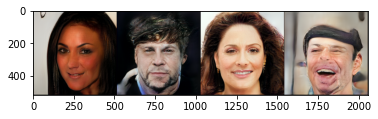

In [2]:
num_images = 4
noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise)

# let's plot these images using torchvision and matplotlib
import matplotlib.pyplot as plt
import torchvision
grid = torchvision.utils.make_grid(generated_images.clamp(min=-1, max=1), scale_each=True, normalize=True)
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
# plt.show()

In [3]:
model2 = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'StyleGAN', model_name='celebAHQ-512',
                       pretrained=True, useGPU=use_gpu)

Using cache found in /root/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub


RuntimeError: ignored

In [4]:
model2 = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-512',
                       pretrained=True, useGPU=use_gpu)

Using cache found in /root/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub


Average network found !


In [5]:
model3 = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'DCGAN', model_name='style_gan_celeba',
                       pretrained=True, useGPU=use_gpu)

Using cache found in /root/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/DCGAN_fashionGen-1d67302.pth" to /root/.cache/torch/hub/checkpoints/DCGAN_fashionGen-1d67302.pth



Average network found !


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


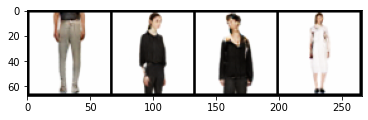

In [6]:
num_images = 4
noise, _ = model3.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model3.test(noise)

# let's plot these images using torchvision and matplotlib
import matplotlib.pyplot as plt
import torchvision
grid = torchvision.utils.make_grid(generated_images.clamp(min=-1, max=1), scale_each=True, normalize=True)
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
# plt.show()

In [7]:
model4 = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'StyleGAN', model_name='FlickrHQ',
                       pretrained=True, useGPU=use_gpu)

Using cache found in /root/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub


RuntimeError: ignored

In [8]:
model4 = torch.hub.load('facebookresearch/pytorch_GAN_zoo:master',
                       'StyleGAN', model_name='FlickrHQ',
                       pretrained=True, useGPU=use_gpu)

Downloading: "https://github.com/facebookresearch/pytorch_GAN_zoo/archive/master.zip" to /root/.cache/torch/hub/master.zip


ModuleNotFoundError: ignored

In [9]:
!pip install git+https://github.com/facebookresearch/pytorch_GAN_zoo@master -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [10]:
!pip install git+https://github.com/facebookresearch/pytorch_GAN_zoo

  Cloning https://github.com/facebookresearch/pytorch_GAN_zoo to /tmp/pip-req-build-3t0s_bed
  Running command git clone -q https://github.com/facebookresearch/pytorch_GAN_zoo /tmp/pip-req-build-3t0s_bed
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [11]:
python setup.py egg_info

SyntaxError: ignored

In [12]:
!python setup.py egg_info

python3: can't open file 'setup.py': [Errno 2] No such file or directory


You should see an image similar to the one on the left.

If you want to train your own Progressive GAN and other GANs from scratch, have a look at [PyTorch GAN Zoo](https://github.com/facebookresearch/pytorch_GAN_zoo).

### Model Description

In computer vision, generative models are networks trained to create images from a given input. In our case, we consider a specific kind of generative networks: GANs (Generative Adversarial Networks) which learn to map a random vector with a realistic image generation.

Progressive Growing of GANs is a method developed by Karras et. al. [1] in 2017 allowing generation of high resolution images. To do so, the generative network is trained slice by slice. At first the model is trained to build very low resolution images, once it converges, new layers are added and the output resolution doubles. The process continues until the desired resolution is reached.

### Requirements

- Currently only supports Python 3

### References

- [Progressive Growing of GANs for Improved Quality, Stability, and Variation](https://arxiv.org/abs/1710.10196)